In [9]:
import pandas as pd

# Import csv data
df = pd.read_csv("songs_normalize.csv")
artist, song, explicit, year, popularity, dance, energy, key, loud, mode, speech, acous, instrumental, live, valence, tempo, genre = df['artist'], df['song'],df['explicit'],df['year'], df['popularity'], df['danceability'], df['energy'], df['key'], df['loudness'], df['mode'],df['speechiness'], df['acousticness'], df['instrumentalness'], df['liveness'],df['valence'],df['tempo'], df['genre']


Text(0.5, 0, 'Training Sets')

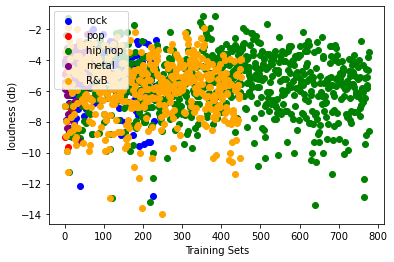

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
# Choose features
X = df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Define truth
y_gt = df[['genre']]

dance_elec_data = []
country_data = []
rock_data = []
metal_data = []
rb_data = []
pop_data = []
hip_hop_data = []
for i in range(2000):
    if 'pop' in genre[i]:
        pop_data.append(df.iloc[i])
    if 'hip hop' in genre[i]:
        hip_hop_data.append(df.iloc[i])
    if 'R&B' in genre[i]:
        rb_data.append(df.iloc[i])
    if 'metal' in genre[i]:
        metal_data.append(df.iloc[i])
    if 'rock' in genre[i]:
        rock_data.append(df.iloc[i])
    if 'country' in genre[i]:
        country_data.append(df.iloc[i])

#extracting the features
metal_loudness, metal_energy = [], []
rb_loudness, rb_energy= [], []
hip_loudness, hip_energy = [], []
pop_loudness, pop_energy = [], []
rock_loudness,rock_energy = [], []

for i in range(18):
    pop_loudness.append(pop_data[i][9])
    pop_energy.append(pop_data[i][6])
for i in range(len(hip_hop_data)):
    hip_loudness.append(hip_hop_data[i][9])
    hip_energy.append(hip_hop_data[i][6])
for i in range(len(metal_data)):
    metal_loudness.append(metal_data[i][9])
    metal_energy.append(metal_data[i][6])
for i in range(len(rock_data)):
    rock_loudness.append(rock_data[i][9])
    rock_energy.append(rock_data[i][6])
for i in range(len(rb_data)):
    rb_loudness.append(rb_data[i][9])
    rb_energy.append(rb_data[i][6])
for i in range(len(dance_elec_data)):
    dance_loudness.append(dance_elec_data[i][9])
    dance_energy.append(dance_elec_data[i][6])

#plt.plot(hip_loudness, 'ro')
#plt.plot(pop_loudness, 'ro')
#plt.axis([0, 20, -20, 0])
#plt.show()
ax = plt.gca()
y, y1, y2, y3, y4 = [], [], [], [], []
for i in range(len(hip_loudness)):
    y.append(i)
for i in range(len(pop_loudness)):
    y1.append(i)
for i in range(len(rock_loudness)):
    y2.append(i)
for i in range(len(metal_loudness)):
    y3.append(i)
for i in range(len(rb_loudness)):
    y4.append(i)    
ax.scatter(y2, rock_loudness, color="b", label = 'rock')
ax.scatter(y1, pop_loudness, color="r", label = 'pop')
ax.scatter(y, hip_loudness, color="g", label = 'hip hop')
ax.scatter(y3, metal_loudness, color="purple", label = 'metal')
ax.scatter(y4, rb_loudness, color="orange", label = 'R&B')
ax.legend(loc= "upper left")
pop = []
for i in range(len(pop_loudness)):
    pop.append([i, pop_loudness[i]])
ax.set_ylabel("loudness (db)")
ax.set_xlabel("Training Sets")

Text(0.5, 0, 'Training sets')

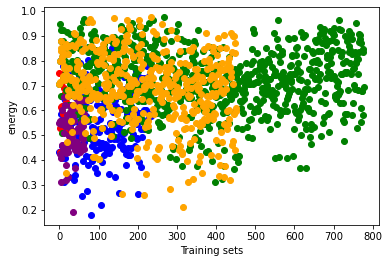

In [20]:
y, y1, y2, y3, y4 = [], [], [], [], []
for i in range(len(hip_energy)):
    y.append(i)
for i in range(len(pop_energy)):
    y1.append(i)
for i in range(len(rock_energy)):
    y2.append(i)
for i in range(len(metal_energy)):
    y3.append(i)
for i in range(len(rb_energy)):
    y4.append(i) 
ax = plt.gca()
ax.scatter(y2, rock_energy, color="b")
ax.scatter(y1, pop_energy, color="r")
ax.scatter(y, hip_energy, color="g")
ax.scatter(y3, metal_energy, color="purple")
ax.scatter(y4, rb_energy, color="orange")
ax.set_ylabel("energy")
ax.set_xlabel("Training sets")

In [3]:
import numpy as np
rock_mean = np.mean(rock_loudness)
rock_var = np.var(rock_loudness)**2
hip_mean = np.mean(hip_loudness)
hip_var = np.var(hip_loudness)**2
pop_mean = np.mean(pop_loudness)
pop_var = np.var(pop_loudness)**2
rb_mean = np.mean(rb_loudness)
rb_var = np.var(rb_loudness)**2
print('rock mean: ', rock_mean)
print('rock var: ', rock_var)
print('hip mean: ', hip_mean)
print('hip var: ', hip_var)
print('pop mean: ', pop_mean)
print('pop var: ', pop_var)
print('rb mean: ', rb_mean)
print('rb var: ', rb_var)

rock mean:  -5.1638717948717945
rock var:  7.371811826530986
hip mean:  -5.598654241645245
hip var:  13.226240662599182
pop mean:  -6.275222222222222
pop var:  6.21017561748919
rb mean:  -5.9061880530973445
rb var:  13.428124421506434


In [4]:
rock = rock_mean - rock_var
pop = pop_mean - pop_var
hip = hip_mean - hip_var
rb = rb_mean - rb_var
print(rock)
print(pop)
print(hip)
print(rb)

-12.53568362140278
-12.485397839711412
-18.824894904244427
-19.334312474603777


In [5]:
i = 0
while(i != 2000):
    print(df['genre'][i])
    i+=1
    

pop
rock, pop
pop, country
rock, metal
pop
hip hop, pop, R&B
hip hop
pop, rock
pop, R&B
Dance/Electronic
pop
pop
pop
rock, pop
pop, Dance/Electronic
hip hop, pop, R&B
pop
pop
pop
hip hop
rock, metal
rock, Folk/Acoustic, easy listening
pop
hip hop
pop, Dance/Electronic
metal
pop, Dance/Electronic
hip hop, pop, R&B
pop, Dance/Electronic
Dance/Electronic
hip hop, pop
pop, R&B
pop
R&B
pop
hip hop, pop, R&B
pop, Dance/Electronic
hip hop
pop, country
pop, R&B
pop, latin
pop, R&B
hip hop, pop, R&B
hip hop
hip hop, pop, R&B
pop
pop
pop, R&B
R&B
hip hop, pop, R&B
pop, R&B
pop, latin
hip hop, pop, R&B
hip hop, pop, R&B
hip hop
pop, R&B
R&B
pop, R&B
pop, country
Folk/Acoustic, rock
pop, easy listening, Dance/Electronic
pop
pop, R&B
hip hop, pop, R&B
pop
pop
rock
hip hop, pop, R&B
hip hop, pop, R&B
rock, blues, latin
pop, R&B
pop
pop
pop, rock
Dance/Electronic
pop, R&B
pop
pop, rock, metal
pop, R&B
hip hop, pop
rock, pop, metal
pop, R&B
pop
pop
pop
pop, R&B
pop
hip hop, R&B
pop, latin
pop, rock
po